<a href="https://colab.research.google.com/github/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [3]:
import pandas as pd
data = pd.read_csv("marketing_campaign.csv", sep='\t')

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

In [6]:
data["Income"] = data["Income"].fillna(data["Income"].median())

In [7]:
data.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


Заповнюю **медіаною** бо не чутлива до викидів що для нас важливо бо багато алгоритмів кластеризації чутливі

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [8]:
data["Education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [9]:
education_map = {
    "Basic": 0,
    "2n Cycle": 1,
    "Graduation": 2,
    "Master": 3,
    "PhD": 4
}
data["Education"] = data["Education"].map(education_map)

In [10]:
data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [11]:
data = pd.get_dummies(data, columns=["Marital_Status"], drop_first=True)

In [12]:
data["Dt_Customer"]

,Dt_Customer
0,04-09-2012
1,08-03-2014
2,21-08-2013
3,10-02-2014
4,19-01-2014
...,...
2235,13-06-2013
2236,10-06-2014
2237,25-01-2014
2238,24-01-2014


In [13]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)

In [14]:
data["Year_Customer"] = data["Dt_Customer"].dt.year

In [15]:
data["Month_Customer"] = data["Dt_Customer"].dt.month

In [16]:
from datetime import datetime
data["Customer_For_Days"] = (datetime.today() - data["Dt_Customer"]).dt.days

In [17]:
data.drop("Dt_Customer", axis=1, inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Education                2240 non-null   int64  
 3   Income                   2240 non-null   float64
 4   Kidhome                  2240 non-null   int64  
 5   Teenhome                 2240 non-null   int64  
 6   Recency                  2240 non-null   int64  
 7   MntWines                 2240 non-null   int64  
 8   MntFruits                2240 non-null   int64  
 9   MntMeatProducts          2240 non-null   int64  
 10  MntFishProducts          2240 non-null   int64  
 11  MntSweetProducts         2240 non-null   int64  
 12  MntGoldProds             2240 non-null   int64  
 13  NumDealsPurchases        2240 non-null   int64  
 14  NumWebPurchases         

In [19]:
data["Education"].unique()

array([2, 4, 3, 0, 1])

**Education** має логічну ієрархію - Label Encoding

**Marital_Status** краще one-hot-encoding, бо там немає чіткого порядку

**Dt_Customer** треба її конвертувати в datetime та розділити на рік місяць кількість днів продовж клєнт з нами

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [20]:
features = [
    'Year_Birth',
    'Income',
    'Kidhome',
    'Teenhome',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Customer_For_Days',
    'Marital_Status_Single',
    'Marital_Status_Married',
    'Marital_Status_Together',
    'Marital_Status_Divorced',
    'Marital_Status_Widow',
]

X = data[features]

In [43]:
X.head(5)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For_Days,Marital_Status_Single,Marital_Status_Married,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow
0,1957,58138.0,0,0,58,635,88,546,172,88,...,8,10,4,7,4596,True,False,False,False,False
1,1954,46344.0,1,1,38,11,1,6,2,1,...,1,1,2,5,4046,True,False,False,False,False
2,1965,71613.0,0,0,26,426,49,127,111,21,...,8,2,10,4,4245,False,False,True,False,False
3,1984,26646.0,1,0,26,11,4,20,10,3,...,2,0,4,6,4072,False,False,True,False,False
4,1981,58293.0,1,0,94,173,43,118,46,27,...,5,3,6,5,4094,False,True,False,False,False


In [33]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

clusters = kmeans.predict(X)

In [34]:
from sklearn import metrics

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, clusters, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.3f}')

Silhouette Coefficient for the data Dataset Clusters: 0.598


Непогана оцінка:
**0.598**

**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [37]:
data['Cluster'] = clusters

In [39]:
data['Cluster'].value_counts()

,count
Cluster,
0,1167
1,1072
2,1


In [40]:
data['TotalSpent'] = data[[
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]].sum(axis=1)

In [41]:
import plotly.express as px

fig = px.scatter_3d(
    data,
    x='Income',
    y='TotalSpent',
    z='NumStorePurchases',
    color='Cluster',
    title='Agglomerative Clustering Income-TotalSpent-NumStorePurchases',
    labels={'Income': 'Income', 'TotalSpent': 'TotalSpent', 'NumStorePurchases': 'NumStorePurchases'},
    opacity=0.7
)
fig.show()

Кластери 0 і 1 — так, виглядають логічно: один з них — більш витратні клієнти з високим доходом, інший — скромніші.

Кластер 2 — не має сенсу, вмглядає як викид.

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [45]:
from sklearn.cluster import KMeans

kmeans_s = KMeans(n_clusters=3, n_init='auto')
kmeans_s.fit(X_scaled)

clusters_s = kmeans_s.predict(X_scaled)

In [46]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, clusters_s)
print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.162


Провела масштабування (StandardScaler) і після цього  силуетний коефіцієнт впав з **~0.598 до 0.162.**

Але можливо це дасть точніший результат, якщо підбирати необхідну кількість кластерів

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [47]:
data.loc[data['Cluster'] == 2]

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Year_Customer,Month_Customer,Customer_For_Days,Cluster,TotalSpent
2233,9432,1977,2,666666.0,1,0,23,9,14,18,...,False,False,True,False,False,2013,6,4325,2,62


In [59]:
X.loc[X['Customer_For_Days'] == 4325]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For_Days,Marital_Status_Single,Marital_Status_Married,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow
2110,1955,58275.0,1,1,48,189,10,253,56,43,...,8,2,7,7,4325,False,False,False,False,True
2233,1977,666666.0,1,0,23,9,14,18,8,1,...,3,1,3,6,4325,False,False,True,False,False


In [48]:
data = data[data['Cluster'] != 2]

In [51]:
data["Cluster"].value_counts()

,count
Cluster,
0,1167
1,1072


In [60]:
features = [
    'Year_Birth',
    'Income',
    'Kidhome',
    'Teenhome',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Customer_For_Days',
    'Marital_Status_Single',
    'Marital_Status_Married',
    'Marital_Status_Together',
    'Marital_Status_Divorced',
    'Marital_Status_Widow',
]

X = data[features]

In [61]:
X.loc[X['Customer_For_Days'] == 4325]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For_Days,Marital_Status_Single,Marital_Status_Married,Marital_Status_Together,Marital_Status_Divorced,Marital_Status_Widow
2110,1955,58275.0,1,1,48,189,10,253,56,43,...,8,2,7,7,4325,False,False,False,False,True


Видаляю викид і в **X** щоб не потрапляв до моделі

**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

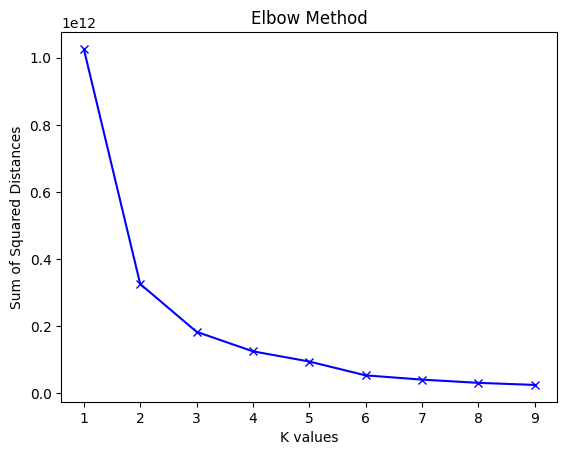

In [62]:
import matplotlib.pyplot as plt

K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [70]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)

clusters = kmeans.predict(X)

In [71]:
from sklearn import metrics

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, clusters, metric='euclidean')
print(f'Silhouette Coefficient for the data Dataset Clusters: {s:.3f}')

Silhouette Coefficient for the data Dataset Clusters: 0.598


Після видалення викиду чітко розділяється на **2 кластери** з оцінкою **0.598**

методом ліктя видно що різке падіння зупиняється на **2**

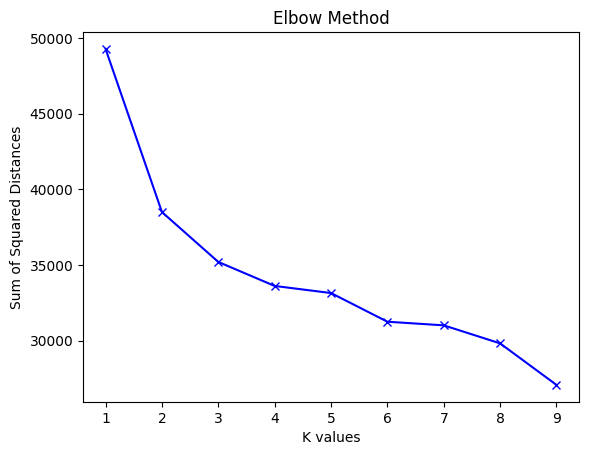

In [63]:
import matplotlib.pyplot as plt

K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model_s = KMeans(n_clusters=k, n_init='auto').fit(X_scaled)
    sum_of_squared_distances.append(model_s.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
from sklearn.cluster import KMeans

kmeans_s = KMeans(n_clusters=2, n_init='auto')
kmeans_s.fit(X_scaled)

clusters_s = kmeans_s.predict(X_scaled)

In [80]:
from sklearn.metrics import silhouette_score

silhouette = silhouette_score(X_scaled, clusters_s)
print(f"Silhouette Score: {silhouette:.3f}")

Silhouette Score: 0.227


З маштабованими даними оцінка нижча - **0.227**, але більше показує реальну картину

також видно що після 2 різко перестає падати рівень лінії



**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [81]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

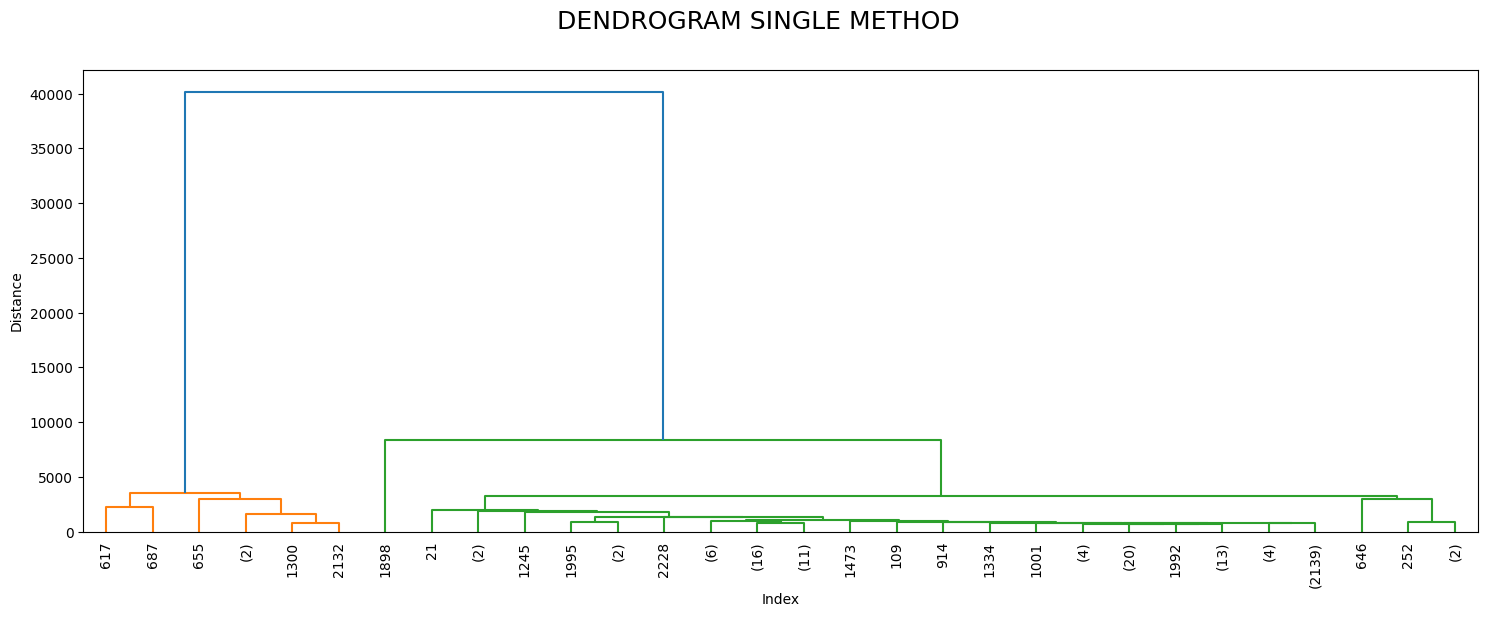

In [82]:
dist_sin = linkage(X, method="single")
plt.figure(figsize=(18,6))
dendrogram( dist_sin, truncate_mode='lastp', leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

Видно, що чітко виділяються два кластери.

In [88]:
from scipy.cluster.hierarchy import fcluster


clusters_2 = fcluster(dist_sin, t=2, criterion='maxclust')
clusters_3 = fcluster(dist_sin, t=3, criterion='maxclust')

In [89]:
import plotly.express as px


fig = px.scatter_3d(
    data,
    x='Income',
    y='TotalSpent',
    z='NumStorePurchases',
    color=clusters_2.astype(str),
    title="Agglomerative Clustering (Single Linkage) - 2 Clusters"
)
fig.show()

fig = px.scatter_3d(
    data,
    x='Income',
    y='TotalSpent',
    z='NumStorePurchases',
    color=clusters_3.astype(str),
    title="Agglomerative Clustering (Single Linkage) - 3 Clusters"
)
fig.show()

In [90]:
from sklearn.metrics import silhouette_score

score_2 = silhouette_score(X, clusters_2)
print(f"Silhouette Score (2 clusters): {score_2:.3f}")

score_3 = silhouette_score(X, clusters_3)
print(f"Silhouette Score (3 clusters): {score_3:.3f}")

Silhouette Score (2 clusters): 0.766
Silhouette Score (3 clusters): 0.558


Загалом ситуація не змінюється: основна маса — один синій кластер, решта — викиди в окремих групах.

Хоча оцінка не низька:

Silhouette Score (2 clusters): 0.766

Silhouette Score (3 clusters): 0.558


**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

In [91]:
dist_ward = linkage(X, method="ward")

In [96]:
dist_com = linkage(X, method="complete")

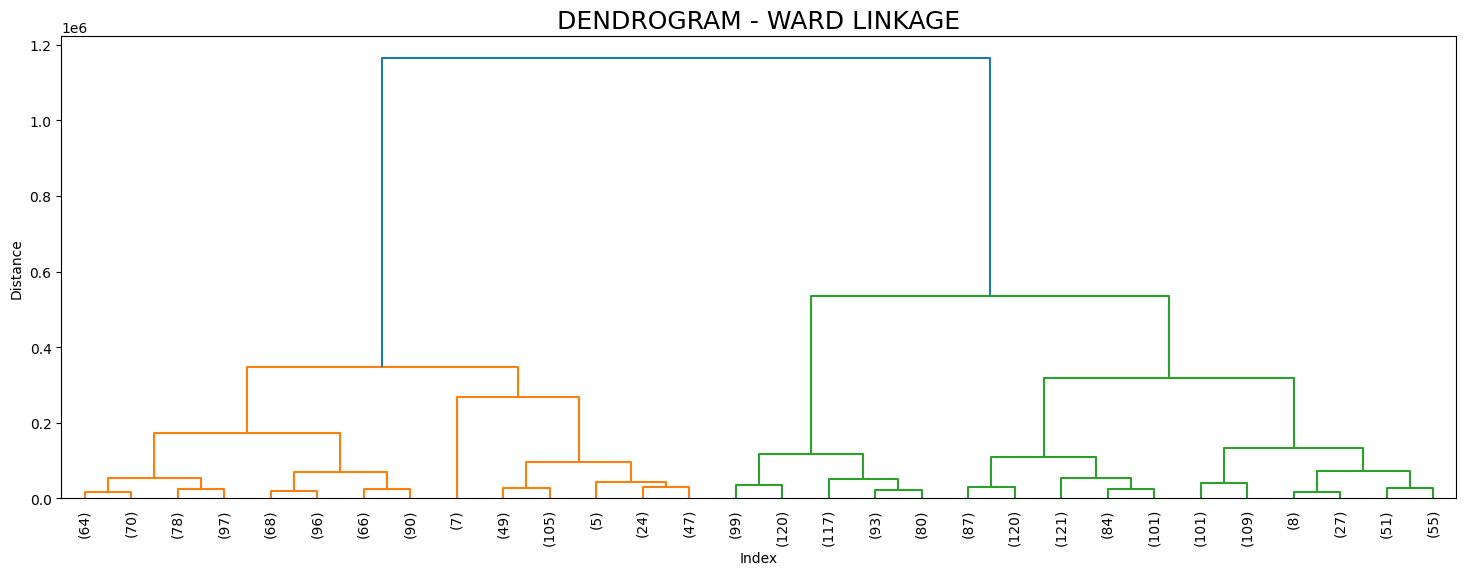

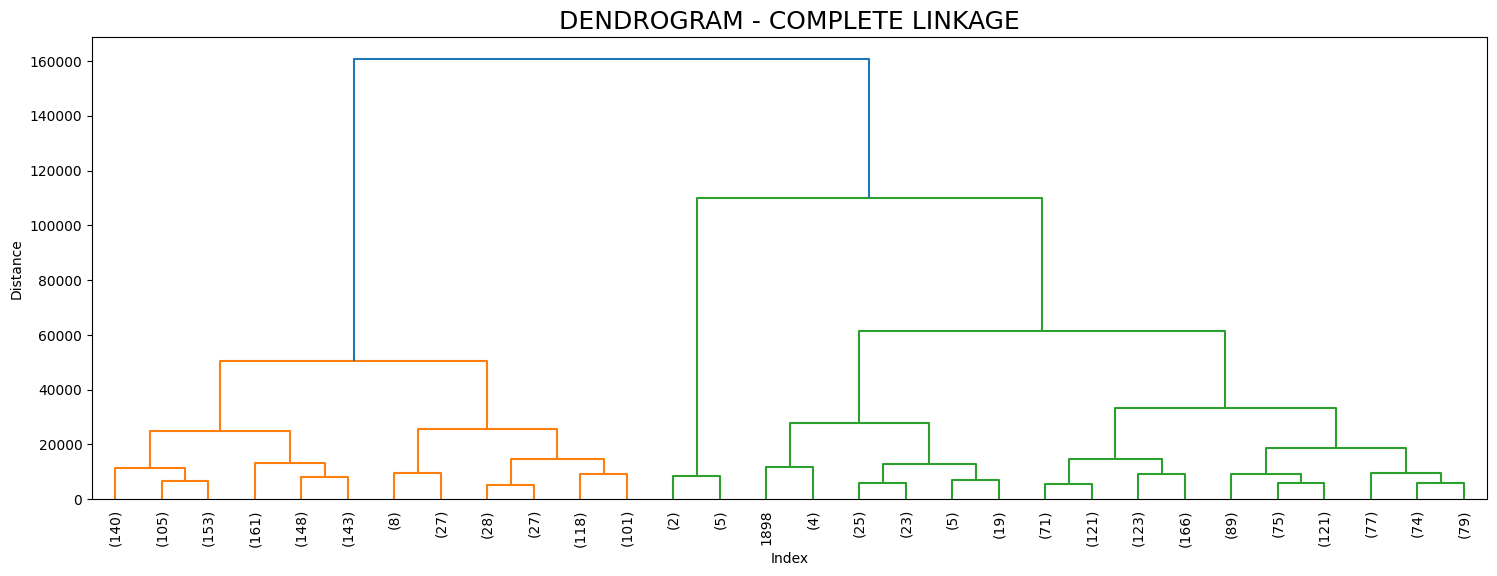

In [98]:
plt.figure(figsize=(18, 6))
dendrogram(dist_ward, truncate_mode='lastp', p=30, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('DENDROGRAM - WARD LINKAGE', fontsize=18)
plt.show()

plt.figure(figsize=(18, 6))
dendrogram(dist_com, truncate_mode='lastp', p=30, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.title('DENDROGRAM - COMPLETE LINKAGE', fontsize=18)
plt.show()

In [100]:

clusters_ward_3 = fcluster(dist_ward, t=3, criterion='maxclust')
clusters_ward_2 = fcluster(dist_ward, t=2, criterion='maxclust')


clusters_com_3 = fcluster(dist_com, t=3, criterion='maxclust')
clusters_com_2 = fcluster(dist_com, t=2, criterion='maxclust')

In [94]:
score_ward_3 = silhouette_score(X, clusters_ward_3)
score_ward_2 = silhouette_score(X, clusters_ward_2)

print(f"Silhouette Score (WARD, 2 clusters): {score_ward_2:.3f}")
print(f"Silhouette Score (WARD, 3 clusters): {score_ward_3:.3f}")

Silhouette Score (WARD, 2 clusters): 0.581
Silhouette Score (WARD, 3 clusters): 0.486


In [101]:
score_com_3 = silhouette_score(X, clusters_com_3)
score_com_2 = silhouette_score(X, clusters_com_2)

print(f"Silhouette Score (complete, 2 clusters): {score_ward_2:.3f}")
print(f"Silhouette Score (complete, 3 clusters): {score_ward_3:.3f}")

Silhouette Score (complete, 2 clusters): 0.581
Silhouette Score (complete, 3 clusters): 0.486


In [103]:
import plotly.express as px


data['ward_2'] = clusters_ward_2

fig = px.scatter_3d(
    data,
    x='Income',
    y='TotalSpent',
    z='NumStorePurchases',
    color='ward_2',
    title="Agglomerative Clustering (WARD) - 2 Clusters"
)
fig.show()

data['ward_3'] = clusters_ward_3

fig = px.scatter_3d(
    data,
    x='Income',
    y='TotalSpent',
    z='NumStorePurchases',
    color='ward_3',
    title="Agglomerative Clustering (WARD) - 3 Clusters"
)
fig.show()

In [105]:
import plotly.express as px

data['com_2'] = clusters_com_2

fig = px.scatter_3d(
    data,
    x='Income',
    y='TotalSpent',
    z='NumStorePurchases',
    color='com_2',
    title="Agglomerative Clustering (complete) - 2 Clusters"
)
fig.show()

data['com_3'] = clusters_com_3

fig = px.scatter_3d(
    data,
    x='Income',
    y='TotalSpent',
    z='NumStorePurchases',
    color='com_3',
    title="Agglomerative Clustering (complete) - 3 Clusters"
)
fig.show()

WARD linkage — 2 кластери
Один кластер — активні клієнти з більшими витратами (TotalSpent)

Другий — менш витратні, з меншою кількістю покупок

Корисно: можна по-різному таргетувати маркетинг — преміум пропозиції vs. знижки/акції.

WARD linkage — 3 кластери
Схожа ситуація, але додано третю групу: можливо, клієнти з низькою активністю, але середніми витратами.

Корисно: окрема стратегія для середньої групи — наприклад, спроба «перетягнути» їх до VIP через лояльність.

COMPLETE linkage — 2 кластери
Можливо, більш чіткий поділ між "високі витрати" vs. "низькі витрати".

Корисно: визначити стратегічну межу між "активними" та "пасивними" клієнтами.

COMPLETE linkage — 3 кластери
Один із кластерів виглядає як викиди або аномалії (низькі витрати, низькі покупки).

 Корисно: їх можна виключити з рекламних кампаній або надати їм просту автоматизовану підтримку.



**ward і complete** дали логічно розподілені групи

**single linkage** не рекомендується — виявляв лише викиди